In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted", font_scale=1.1)

df = pd.read_csv("cheating_features.csv")
df.head()

,File_1,File_2,Label,AST_Similarity,Cosine_Count,Cosine_TFIDF,Jaccard,Levenshtein
0,submission1.py,submission2.py,1,100.000000,100.000000,100.000000,100.000000,100.000000
1,submission1.py,submission3.py,0,97.208539,100.000000,100.000000,81.818182,97.777778
2,submission1.py,submission4.py,1,71.490593,85.634884,76.286937,83.333333,76.470588
3,submission1.py,submission5.py,0,97.049180,100.000000,100.000000,81.818182,97.777778
4,submission2.py,submission3.py,0,97.208539,100.000000,100.000000,81.818182,97.777778


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   File_1          293 non-null    object 
 1   File_2          293 non-null    object 
 2   Label           293 non-null    int64  
 3   AST_Similarity  293 non-null    float64
 4   Cosine_Count    293 non-null    float64
 5   Cosine_TFIDF    293 non-null    float64
 6   Jaccard         293 non-null    float64
 7   Levenshtein     293 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 18.4+ KB


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Label,293.0,0.341297,0.474956,0.000000,0.000000,0.000000,1.000000,1.0
AST_Similarity,293.0,59.262321,26.495244,0.609756,34.544091,67.060998,81.517989,100.0
Cosine_Count,293.0,78.175457,22.545408,0.000000,63.685094,85.634884,96.836405,100.0
Cosine_TFIDF,293.0,76.867233,23.076052,0.000000,60.347195,83.963381,96.095413,100.0
Jaccard,293.0,87.066440,15.686243,0.000000,81.818182,90.909091,96.875000,100.0
Levenshtein,293.0,53.236178,31.898902,0.000000,23.240741,47.988904,84.333821,100.0


In [27]:
df.isnull().sum()

,0
File_1,0
File_2,0
Label,0
AST_Similarity,0
Cosine_Count,0
Cosine_TFIDF,0
Jaccard,0
Levenshtein,0


In [28]:
(df.iloc[:, 3:] > 100).sum()

,0
AST_Similarity,0
Cosine_Count,0
Cosine_TFIDF,0
Jaccard,0
Levenshtein,0


/tmp/ipython-input-361123780.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Label", palette="Set2")


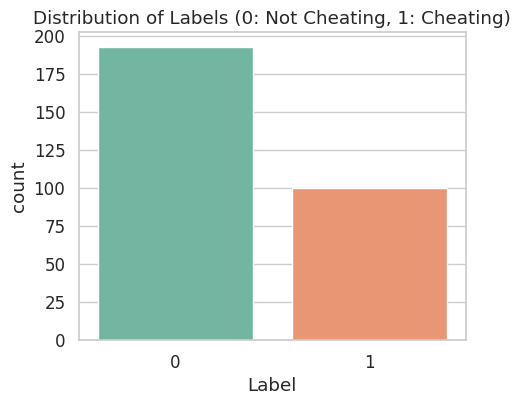

In [29]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x="Label", palette="Set2")
plt.title("Distribution of Labels (0: Not Cheating, 1: Cheating)")
plt.show()

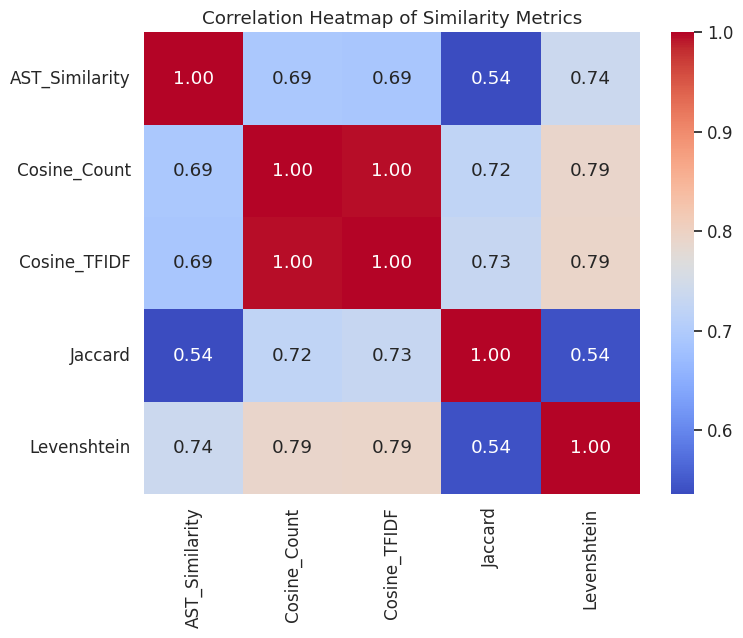

In [30]:
plt.figure(figsize=(8,6))
sns.heatmap(df.iloc[:, 3:].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Similarity Metrics")
plt.show()

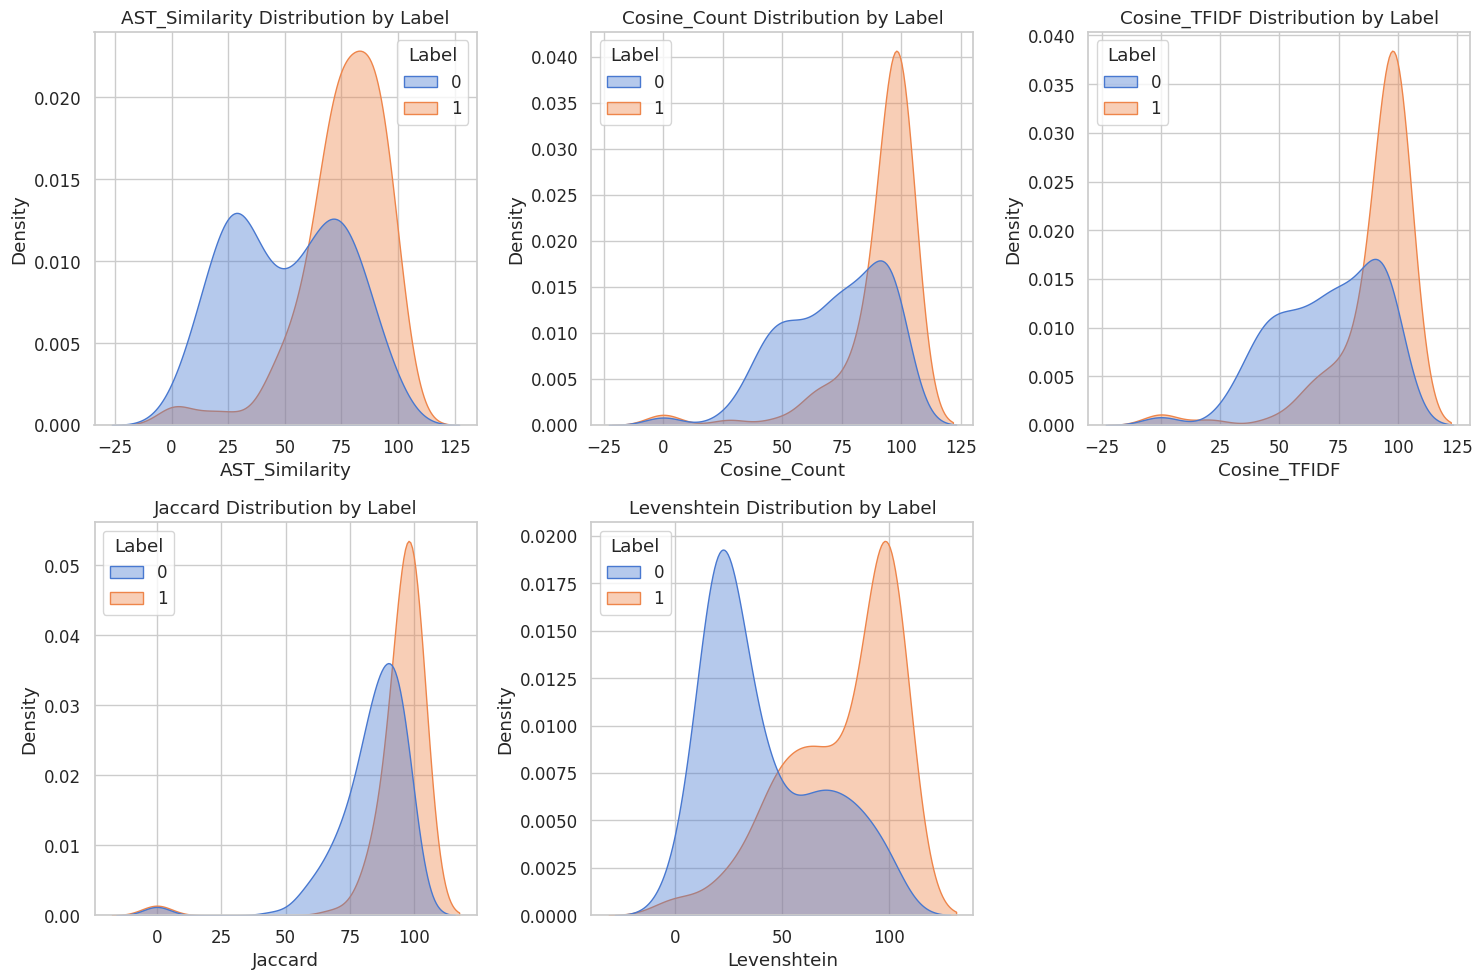

In [31]:
features = ["AST_Similarity", "Cosine_Count", "Cosine_TFIDF", "Jaccard", "Levenshtein"]

plt.figure(figsize=(15, 10))
for i, feat in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(data=df, x=feat, hue="Label", fill=True, common_norm=False, alpha=0.4)
    plt.title(f"{feat} Distribution by Label")
plt.tight_layout()
plt.show()

In [32]:
correlations = df.select_dtypes(include=np.number).corr()["Label"].sort_values(ascending=False)
correlations

,Label
Label,1.000000
Levenshtein,0.548511
AST_Similarity,0.448871
Cosine_TFIDF,0.407400
Cosine_Count,0.401260
Jaccard,0.321526


/tmp/ipython-input-4253906951.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.index, y=correlations.values, palette="viridis")


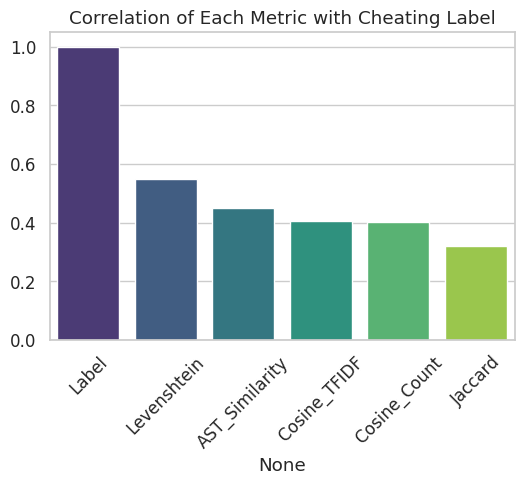

In [33]:
plt.figure(figsize=(6,4))
sns.barplot(x=correlations.index, y=correlations.values, palette="viridis")
plt.title("Correlation of Each Metric with Cheating Label")
plt.xticks(rotation=45)
plt.show()

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])
scaled_df = pd.DataFrame(scaled_features, columns=features)

scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
AST_Similarity,293.0,7.275182e-17,1.001711,-2.217489,-0.934527,0.294846,0.841424,1.540177
Cosine_Count,293.0,-7.275182e-17,1.001711,-3.473399,-0.643819,0.331428,0.829121,0.969682
Cosine_TFIDF,293.0,-3.637591e-16,1.001711,-3.336738,-0.717120,0.308037,0.834678,1.004173
Jaccard,293.0,8.487712e-16,1.001711,-5.559993,-0.335150,0.245389,0.626367,0.825927
Levenshtein,293.0,7.275182e-17,1.001711,-1.671758,-0.941937,-0.164778,0.976549,1.468509



Dropping columns: ['File_1', 'File_2']

Metric columns: ['AST_Similarity', 'Cosine_Count', 'Cosine_TFIDF', 'Jaccard', 'Levenshtein']


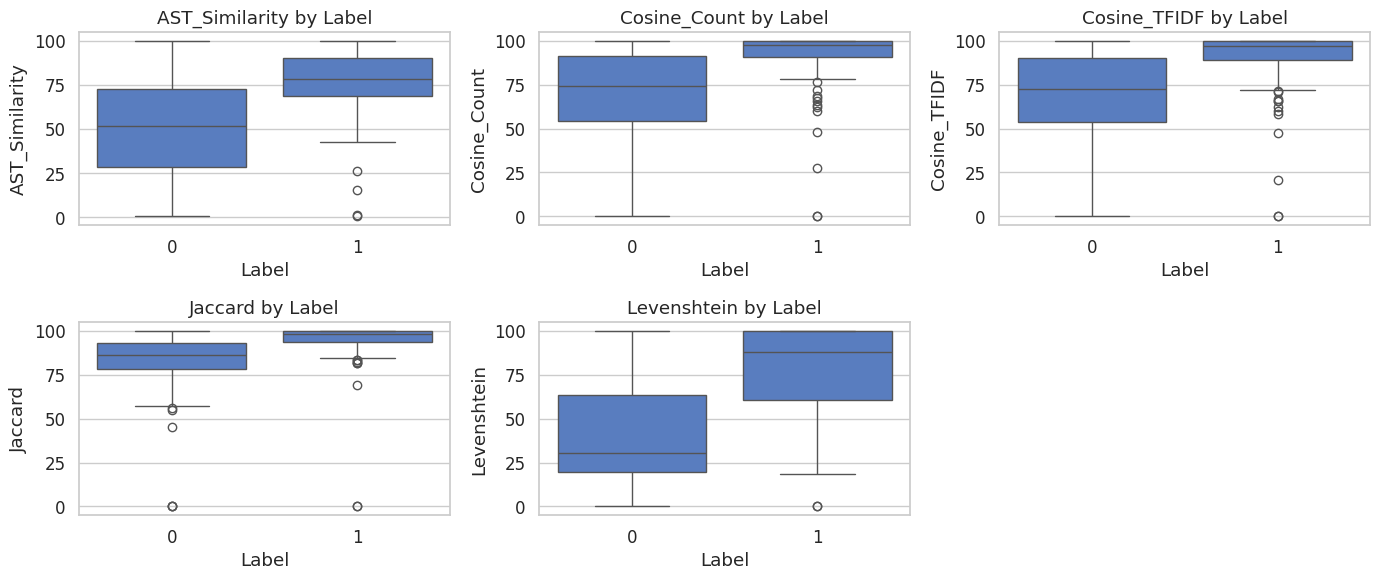

In [35]:
drop_cols = [c for c in ['File_1','File_2'] if c in df.columns]
if drop_cols:
    print("\nDropping columns:", drop_cols)
    df = df.drop(columns=drop_cols)

metric_cols = [c for c in df.columns if c != 'Label']
print("\nMetric columns:", metric_cols)

plt.figure(figsize=(14, 3*int(np.ceil(len(metric_cols)/3))))
for i,c in enumerate(metric_cols,1):
    plt.subplot(int(np.ceil(len(metric_cols)/3)),3,i)
    sns.boxplot(x='Label', y=c, data=df)
    plt.title(f'{c} by Label')
plt.tight_layout()
plt.show()

In [36]:
# Core libraries
import pandas as pd
import numpy as np

# ML + evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [37]:
df = pd.read_csv("cheating_features.csv")

features = ["AST_Similarity", "Cosine_Count", "Cosine_TFIDF", "Jaccard", "Levenshtein"]
X = df[features]
y = df["Label"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(kernel="rbf", probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}

results = []

for name, model in models.items():
    # Use scaled version for models that are distance-based or linear
    if name in ["Logistic Regression", "K-Nearest Neighbors", "Support Vector Machine"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "F1 Score": f1,
        "Precision": prec,
        "Recall": rec
    })

results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
results_df

,Model,Accuracy,F1 Score,Precision,Recall
2,Support Vector Machine,0.840909,0.750000,0.807692,0.700000
6,XGBoost,0.795455,0.700000,0.700000,0.700000
1,K-Nearest Neighbors,0.784091,0.688525,0.677419,0.700000
3,Random Forest,0.795455,0.678571,0.730769,0.633333
5,AdaBoost,0.761364,0.655738,0.645161,0.666667
0,Logistic Regression,0.761364,0.618182,0.680000,0.566667
4,Gradient Boosting,0.738636,0.596491,0.629630,0.566667


In [42]:
def predict_plagiarism(svm_model, *features):

    input_data = np.array(features).reshape(1, -1)

    prediction = svm_model.predict(input_data)

    return int(prediction[0])

In [43]:
svm_model = models["Support Vector Machine"]

result = predict_plagiarism(svm_model, 0.95, 0.92, 0.99, 0.90, 0.98)
print("Predicted:", "Plagiarized" if result == 1 else "Not Plagiarized")

Predicted: Plagiarized


In [44]:
import pickle

model_package = {
    "scaler": scaler,
    "model": models["Support Vector Machine"]
}

with open("svm_plagiarism_model.pkl", "wb") as f:
    pickle.dump(model_package, f)

print("Model saved as svm_plagiarism_model.pkl")

Model saved as svm_plagiarism_model.pkl
